In [ ]:
! git clone https://github.com/joeynmt/joeynmt.git

Cloning into 'joeynmt'...
remote: Enumerating objects: 3224, done.
remote: Counting objects: 100% (273/273), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 3224 (delta 157), reused 206 (delta 134), pack-reused 2951
Receiving objects: 100% (3224/3224), 8.17 MiB | 16.70 MiB/s, done.
Resolving deltas: 100% (2186/2186), done.


In [ ]:
%%shell

# Some dependency errors are fine as long as joeynmt was installed

cd joeynmt
pip3 install . --user

Processing /content/joeynmt
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 90 kB 4.4 MB/s 
     |████████████████████████████████| 596 kB 35.2 MB/s 
     |████████████████████████████████| 392 kB 43.4 MB/s 
     |████████████████████████████████| 106 kB 49.4 MB/s 
     |████████████████████████████████| 246 kB 47.6 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 743 kB 37.6 MB/s 
  Created wheel for joeynmt: filename=joeynmt-1.3-py3-none-any.whl size=86029 sha256=a83a24256818049b92bf44666239c42e79da4ce144c835ba3d81c4af369aaf28
  Stored in directory: /

## Data: WMT19 Russian - English

Data sources:
- commoncrawl.ru-en
- news-commentary-v12.ru-en
- news-commentary-v14.ru-en

We will use the preprocessed data:
- BPE dictionary of 24K tokens
- Length cleaning: discard sentences with more than 1.5 length ratio
- Length cleaning: discard sentences with length > 250 tokens

In [ ]:
!gdown --id 1UOmzPnYpDRD19Y264DYvIOzGt2ApiqFq
!gdown --id 1NZTfibntOCLYfoO8kWLiFPpI_0dpXLdX
!gdown --id 1Ud_TigF0MD5txInFMBOEdMq8GNbylxMU
!gdown --id 1JVUOimOq3qa4d4dzaOG6JgpYofe5Y5m-
!gdown --id 17UKjXif0j1PvCVabShxJqijOmtN7NlM7
!gdown --id 1qEu5f0CZM6WAwsThIQ52rkMzj9RbpofQ
!gdown --id 1McF0JYgwI5g1McFzsOjBG9SlFdP0NhCY
!gdown --id 1Y1XwBY_9-eKzyl98NTnr5YjVMv3JaGIX

Downloading...
From: https://drive.google.com/uc?id=1UOmzPnYpDRD19Y264DYvIOzGt2ApiqFq
To: /content/valid.en
100% 1.54M/1.54M [00:00<00:00, 49.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NZTfibntOCLYfoO8kWLiFPpI_0dpXLdX
To: /content/train.ru
100% 280M/280M [00:01<00:00, 177MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ud_TigF0MD5txInFMBOEdMq8GNbylxMU
To: /content/train.en
100% 151M/151M [00:00<00:00, 183MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JVUOimOq3qa4d4dzaOG6JgpYofe5Y5m-
To: /content/test.ru
100% 436k/436k [00:00<00:00, 57.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=17UKjXif0j1PvCVabShxJqijOmtN7NlM7
To: /content/test.en
100% 256k/256k [00:00<00:00, 36.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qEu5f0CZM6WAwsThIQ52rkMzj9RbpofQ
To: /content/dict.ru.txt
100% 516k/516k [00:00<00:00, 34.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1McF0JYgwI5g1McFzsOjBG9SlFdP0NhCY
To: /content/valid.ru
100% 2.85

In [ ]:
! gdown --id 1EzCJB_JuTxKv4cAsZfA9gZX6RF4ckCqL

Downloading...
From: https://drive.google.com/uc?id=1EzCJB_JuTxKv4cAsZfA9gZX6RF4ckCqL
To: /content/dict.ru.joey.txt
100% 365k/365k [00:00<00:00, 47.5MB/s]


## Printing some training data

Here we deal with the so called parallel corpus: every input sentence has a known matching translation. 

This differs from self-supervised next word prediction where we do not need any specific annotation such as translation.

Note that our data is:

1. Tokenized: punctuation is separated etc.
2. BPE processed: tokens are splitted using the BPE subword tokenization.


In [ ]:
%%shell

head -n 3 ./train.ru
echo
head -n 3 ./train.en

ir@@ on c@@ ement - это гото@@ вая к использованию па@@ ста , которая на@@ носи@@ тся ш@@ па@@ телем или паль@@ цами в виде за@@ круг@@ ленного перехода в уг@@ лы ста@@ ле@@ ли@@ тей@@ ного ко@@ ки@@ ля .
После отвер@@ ждения ir@@ on c@@ ement защи@@ щает ко@@ ки@@ ль от горя@@ чего аб@@ рази@@ вного ста@@ льного ли@@ тья .
Перед каждой новой зали@@ вкой необходимо заново нанести ir@@ on c@@ ement сло@@ ем тол@@ щи@@ ной ~ 2 @-@ 3 мм .

iron cement is a ready for use p@@ aste which is laid as a fil@@ let by put@@ ty knife or finger in the m@@ ould edges ( corners ) of the steel ing@@ ot m@@ ould .
iron cement protects the ing@@ ot against the hot , ab@@ ra@@ sive steel casting process .
iron cement is fre@@ shly applied after each steel pour in a co@@ ating th@@ ick@@ ness of appro@@ x . ~ 2 @-@ 3 mm .


### BPE: Byte-pair encoding

Byte Pair Encoding (BPE) (Gage, 1994) is a simple data compression technique that iteratively replaces the most frequent pair of bytes in a sequence with a single, unused byte:

![](https://drive.google.com/uc?export=view&id=1OmhcjMaG1Frtyh_x9BmwOcui-dovTKyY)
ref: https://aclanthology.org/P16-1162.pdf

### BPE merge table vs. final vocabulary

After learning/training BPE merges we end up wuth the so-called merge list (number defines the priority of this merge) which looks like this in case of fastBPE implementation:

```
t h 813208255
i n 595777764
a n 473755026
th e</w> 453078113
r e 381306770
e r 348447747
p o 303854151
e d</w> 302870348
e n 292459577
t i 290010185
a r 289704821
in g</w> 286152168
e r</w> 285163016
o u 276139145
o n 274496732
t o</w> 259597436
o n</w> 258369586
an d</w> 234359337
o f</w> 225115691
o r 217513055
```

note that some merges include `<w>` end of word special character. For example, `the` is produced by merging two subword units `th` and `e`.

We specify maximum number of merge operations when we learn BPE codes. Thus the effective vocabulary size **will differ** from this number of merges since we expect single characters to appear as well which do not have any merge operations. In addition, a character may appear as ending the word token e.g. `e` or inter-word token `e@@` which gives us `2*num_characters`. 

What else can appear in the final vocabulary / dictionary after we apply BPE on the training data? Unique tokens which were not utilized by BPE algorithm e.g. some noise / foreign abbreviations in english data or so.

As an informative example, our setup had max 24K BPE merges while our vocabulary reached ~32K tokens. You can check the dictionary as well as BPE codes as text files here in Colab.

To wrap it up, the general pipeline is: 

1. Learn BPE from given corpus.
2. Apply BPE on that corpus to create BPE-level variant.
3. Create vocabulary based on BPE-level variant as we always do in this class.

### Visualization of applying the BPE algorithm on a given word to tokenize it

Visual example from https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html#bpe

![](https://lena-voita.github.io/resources/lectures/seq2seq/bpe/bpe_apply.gif)

## Training model from scratch

Here we compose Joey-NMT config to train seq2seq transformer model from scratch.

Training of such model takes a while, so we don't rely on training it during the lab but use the pre-trained model which we prepared for you beforehand.

In [ ]:
# This creates the config file for our JoeyNMT system. It might seem overwhelming so we've provided a couple of useful parameters you'll need to update
# (You can of course play with all the parameters if you'd like!)

source_language='ru'
target_language='en'

name = '%s%s' % (source_language, target_language)

# Create the config
config = """
name: "{name}_transformer"

data:
    src: "{source_language}"
    trg: "{target_language}"
    train: "./train"
    dev:   "./valid"
    test:  "./test"
    level: "bpe"
    lowercase: True
    max_sent_length: 250
    src_vocab: "./dict.ru.joey.txt"
    trg_vocab: "./dict.en.joey.txt"

testing:
    beam_size: 1
    alpha: 1.0
    sacrebleu:                      # sacrebleu options
        remove_whitespace: True     # `remove_whitespace` option in sacrebleu.corpus_chrf() function (defalut: True)
        tokenize: "none"            # `tokenize` option in sacrebleu.corpus_bleu() function (options include: "none" (use for already tokenized test data), "13a" (default minimal tokenizer), "intl" which mostly does punctuation and unicode, etc) 

training:
    random_seed: 42
    optimizer: "adam"
    normalization: "tokens"
    adam_betas: [0.9, 0.999] 
    scheduling: "plateau"           # TODO: try switching from plateau to Noam scheduling
    patience: 5                     # For plateau: decrease learning rate by decrease_factor if validation score has not improved for this many validation rounds.
    learning_rate_factor: 0.5       # factor for Noam scheduler (used with Transformer)
    learning_rate_warmup: 1000      # warmup steps for Noam scheduler (used with Transformer)
    decrease_factor: 0.7
    loss: "crossentropy"
    learning_rate: 0.0003
    learning_rate_min: 0.00000001
    weight_decay: 0.0
    label_smoothing: 0.1
    batch_size: 4096
    batch_type: "token"
    eval_batch_size: 32
    eval_batch_type: "sentence"
    batch_multiplier: 1
    early_stopping_metric: "ppl"
    epochs: 30                     # TODO: Decrease for when playing around and checking of working. Around 30 is sufficient to check if its working at all
    validation_freq: 5000          # TODO: Set to at least once per epoch.
    logging_freq: 100
    eval_metric: "bleu"
    model_dir: "models/nlp_lab_transformer_fromscratch"
    overwrite: True               # TODO: Set to True if you want to overwrite possibly existing models. 
    shuffle: True
    use_cuda: True
    max_output_length: 30
    print_valid_sents: [0, 1, 2, 3]
    keep_best_ckpts: 3

model:
    initializer: "xavier"
    bias_initializer: "zeros"
    init_gain: 1.0
    embed_initializer: "xavier"
    embed_init_gain: 1.0
    tied_embeddings: False
    tied_softmax: False
    encoder:
        type: "transformer"
        num_layers: 6
        num_heads: 4             # TODO: Increase to 8 for larger data.
        embeddings:
            embedding_dim: 256   # TODO: Increase to 512 for larger data.
            scale: True
            dropout: 0.2
        # typically ff_size = 4 x hidden_size
        hidden_size: 256         # TODO: Increase to 512 for larger data.
        ff_size: 1024            # TODO: Increase to 2048 for larger data.
        dropout: 0.3
    decoder:
        type: "transformer"
        num_layers: 6
        num_heads: 4              # TODO: Increase to 8 for larger data.
        embeddings:
            embedding_dim: 256    # TODO: Increase to 512 for larger data.
            scale: True
            dropout: 0.2
        # typically ff_size = 4 x hidden_size
        hidden_size: 256         # TODO: Increase to 512 for larger data.
        ff_size: 1024            # TODO: Increase to 2048 for larger data.
        dropout: 0.3
""".format(name=name, source_language=source_language, target_language=target_language)
with open("transformer_train_fromscratch.yaml".format(name=name),'w') as f:
    f.write(config)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!python3 -m joeynmt train ./transformer_train_fromscratch.yaml

2021-10-19 18:59:25,981 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2021-10-19 18:59:26,045 - INFO - joeynmt.data - Loading training data...
Traceback (most recent call last):
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/root/.local/lib/python3.7/site-packages/joeynmt/__main__.py", line 48, in <module>
    main()
  File "/root/.local/lib/python3.7/site-packages/joeynmt/__main__.py", line 35, in main
    train(cfg_file=args.config_path, skip_test=args.skip_test)
  File "/root/.local/lib/python3.7/site-packages/joeynmt/training.py", line 817, in train
    data_cfg=cfg["data"])
  File "/root/.local/lib/python3.7/site-packages/joeynmt/data.py", line 81, in load_data
    lambda x: len(vars(x)['src'])
  File "/usr/local/lib/python3.7/dist-packages/torchtext/legacy/datasets/translation.py", line 43, in __init__
  File "/usr/local/lib/p

## Checking the model parameterization in the code

1. We have an encoder-decoder type of model. Open `joeynmt/joeynmt/model.py`. Note how both RNN and Transformer based decoder/encoder are supported using base classes.

2. Go to `decoders.py` and see that `encoder_hidden` and `unroll_steps` are not used in the case of transformer, but used with RNN/LSTM. **Why**? 

3. Go to `transformer_layers.py`. **Important!**: Decoder layer has 2 distinct attention components: source-target or encoder-decoder (not self) and causal target-target (self) attention (line 233-235). How are they combined then? (lines 260-272). More visual examples about encoder-decoder attention can be found here: https://jalammar.github.io/illustrated-transformer/

Overall architecture looks like this on the high-level:

![](https://drive.google.com/uc?export=view&id=17q7LuPPpCb7RyfGcfi3bofkvgRbKSYna)



## Downloading pre-trained model 

In [ ]:
%%shell

gdown --id 1InJkMQiXaAxHnzbpedJST7ydxbdZZJfm

Downloading...
From: https://drive.google.com/uc?id=1InJkMQiXaAxHnzbpedJST7ydxbdZZJfm
To: /content/pretrained_model.tar.gz
100% 337M/337M [00:01<00:00, 171MB/s]


In [ ]:
! mkdir models

In [ ]:
! tar xzvf pretrained_model.tar.gz --directory ./models/

upload/
upload/config.yaml
upload/test.log
upload/validations.txt
upload/trg_vocab.txt
upload/300000.ckpt
upload/src_vocab.txt


In [ ]:
# joeynmt can plot some statistic for us

! python3 ./joeynmt/scripts/plot_validations.py ./models/upload/ --plot_values bleu PPL --output_path BLEU.png

 ## NMT Evaluation: search / decoding / inference

 There exist many names under the procedure of finding the translation of a given unseen input using a model we have trained.

 Here we rely on the so called maximum of a posterior decision rule:

 $$
\hat{y} = \arg_y \max p(y|x;\theta) 
 $$

 where the posterior is a distribution over the unknown translation space which was trained using lots of translations from training data.

 **Very important:**

 $$
\max_y p(y|x;\theta) = \max_y \prod_t p(y_t|y_{<t}, x; \theta) \neq \prod_t \max_y p(y_t|y_{<t}, x; \theta).
 $$

 Here we are going to use beam search as an approximation algorithm to solve optimization problem above. We need to use an approximation since the variable length space of possible translation is extremely large.



 Due to time constraints we won't go deep in details about beam search, but we emphasize the most important hyper-parameter: **beam width / size**. Beam width determines the number of maintained hypotheses during the generation process to be considered at every time step. For example, beam size 1 means that only single hypothesis is being generated. This special case is often called greedy search. 
 
 In contrast, beam width infinity will result in exact ebnumeration of all possible hypotheses thus it solves the optimization problem above exactly, however, it is infeasible to run this in practice.

In [ ]:
# visual example of beam search from https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html#seq2seq_inference
! wget https://lena-voita.github.io/resources/lectures/seq2seq/general/beam_search.mp4

--2021-10-19 21:35:50--  https://lena-voita.github.io/resources/lectures/seq2seq/general/beam_search.mp4
Resolving lena-voita.github.io (lena-voita.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to lena-voita.github.io (lena-voita.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113260 (111K) [video/mp4]
Saving to: ‘beam_search.mp4’

beam_search.mp4     100%[===================>] 110.61K  --.-KB/s    in 0.02s   

2021-10-19 21:35:50 (5.34 MB/s) - ‘beam_search.mp4’ saved [113260/113260]



In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('beam_search.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1080 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
# removing validation data from the config so that we only generate on the test set
with open('./models/upload/config.yaml', 'r') as f:
    cfg = f.read()
    cfg = cfg.replace('dev:   "./valid"', '')
    new_cfg = open('./models/upload/config_testonly.yaml', 'w')
    new_cfg.write(cfg)
    new_cfg.close()

In [ ]:
! python3 -m joeynmt test ./models/upload/config_testonly.yaml

2021-10-19 19:44:09,170 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2021-10-19 19:44:09,171 - INFO - joeynmt.data - Building vocabulary...
2021-10-19 19:44:23,628 - INFO - joeynmt.data - Loading test data...
2021-10-19 19:44:23,724 - INFO - joeynmt.data - Data loaded.
2021-10-19 19:44:23,747 - INFO - joeynmt.prediction - Process device: cuda, n_gpu: 1, batch_size per device: 32
2021-10-19 19:44:23,747 - INFO - joeynmt.prediction - Loading model from models/upload/300000.ckpt
2021-10-19 19:44:26,388 - INFO - joeynmt.model - Building an encoder-decoder model...
2021-10-19 19:44:26,996 - INFO - joeynmt.model - Enc-dec model built.
2021-10-19 19:44:27,113 - INFO - joeynmt.prediction - Decoding on test set (./test.en)...
2021-10-19 19:45:05,782 - WARNING - sacrebleu - That's 100 lines that end in a tokenized period ('.')
2021-10-19 19:45:05,782 - WARNING - sacrebleu - It looks like you forgot to detokenize your test data, which may hurt your score.
2021-10-19 19:45:05,782 - WARNI

So, is this BLEU good? or bad? We will study the importance of a proper evaluation next week!

## Interactive translation

What do we need to perform live translation? **Pre-processing!**

In [ ]:
! pip install fastBPE

  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp37-cp37m-linux_x86_64.whl size=483107 sha256=25209f370a46eb0ad148a9cdd59e4a4ca6f4f83606f01517cbfa3fa92cb890f5
  Stored in directory: /root/.cache/pip/wheels/bd/d4/0e/0d317a65f77d3f8049fedd8a2ee0519164cf3e6bd77ef886f1
Successfully built fastBPE


In [ ]:
! git clone https://github.com/glample/fastBPE.git

Cloning into 'fastBPE'...
remote: Enumerating objects: 59, done.
remote: Total 59 (delta 0), reused 0 (delta 0), pack-reused 59
Unpacking objects: 100% (59/59), done.


In [ ]:
! g++ -std=c++11 -pthread -O3 fastBPE/fastBPE/main.cc -IfastBPE -o fast

In [ ]:
! gdown --id 1BgT0l4vkZ7n_cXmBLMf4DL9NtdI60VAE
! gdown --id 1Vw8QJfJ9bnmNZCXaT0HZWnttaYItMW9M 

Downloading...
From: https://drive.google.com/uc?id=1BgT0l4vkZ7n_cXmBLMf4DL9NtdI60VAE
To: /content/dict.ru.txt
100% 516k/516k [00:00<00:00, 67.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Vw8QJfJ9bnmNZCXaT0HZWnttaYItMW9M
To: /content/ru24k.fastbpe.code
100% 549k/549k [00:00<00:00, 34.9MB/s]


**Important!** 

You must use codes and vocab from the same pipeline which was used to train the model: vocabulary must match!

In [ ]:
import fastBPE

bpe = fastBPE.fastBPE('./ru24k.fastbpe.code', './dict.ru.txt')
bpe.apply(["Проверка кодирования входных строк , с шумной строкой : ствраовалпдвапваповалп ."])

['Провер@@ ка коди@@ рования в@@ ход@@ ных стро@@ к , с ш@@ ум@@ ной стро@@ кой : ств@@ ра@@ о@@ ва@@ л@@ п@@ д@@ ва@@ п@@ ва@@ пова@@ л@@ п .']

In [ ]:
src = 'Дом и тогда был, как теперь, большой, с двумя воротами и четырьмя подъездами по улице, с тремя дворами в глубину.'
ref = 'Then, as now, the house was large; it had two gates, four doorways onto the street, and three courtyards within.'

bpe.apply(["Дом и тогда был, как теперь, большой, с двумя воротами и четырьмя подъездами по улице, с тремя дворами в глубину.".lower()])

['дом и тогда бы@@ л@@ , как те@@ пер@@ ь@@ , большо@@ й@@ , с двумя воро@@ тами и четы@@ рь@@ мя подъе@@ зда@@ ми по ули@@ це@@ , с тремя дво@@ рами в глубин@@ у@@ .']

In [ ]:
bpe.apply(["В башкирском языке топоним «Урал» осознается как весьма древний , вероятно восходящий к пратюркскому состоянию .".lower()])

['в баш@@ кир@@ ском языке топо@@ ним «@@ ура@@ л@@ » осозна@@ ется как весьма древ@@ ний , вероятно вос@@ ходя@@ щий к пра@@ тю@@ р@@ к@@ скому состоянию .']

In [ ]:
! python3 -m joeynmt translate ./models/upload/config.yaml

2021-10-19 21:45:55,875 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2021-10-19 21:46:10,386 - INFO - joeynmt.prediction - Loading model from models/upload/300000.ckpt
2021-10-19 21:46:25,125 - INFO - joeynmt.model - Building an encoder-decoder model...
2021-10-19 21:46:25,850 - INFO - joeynmt.model - Enc-dec model built.

Please enter a source sentence (pre-processed): 
дом и тогда бы@@ л@@ , как те@@ пер@@ ь@@ , большо@@ й@@ , с двумя воро@@ тами и четы@@ рь@@ мя подъе@@ зда@@ ми по ули@@ це@@ , с тремя дво@@ рами в глубин@@ у@@ .
JoeyNMT: Hypotheses ranked by score
JoeyNMT #1: house and then byl, as teperja , a big , with two gates and four rise on the street , with three courses in

Please enter a source sentence (pre-processed): 
в баш@@ кир@@ ском языке топо@@ ним «@@ ура@@ л@@ » осозна@@ ется как весьма древ@@ ний , вероятно вос@@ ходя@@ щий к пра@@ тю@@ р@@ к@@ скому состоянию .
JoeyNMT: Hypotheses ranked by score
JoeyNMT #1: in bashkir language the topotopology of ur

In [ ]:
# increasing the beam size by changing the config file
template_config = open('./models/upload/config.yaml', 'r').read()

In [ ]:
beams = [5,10,20,50,100]

for b in beams:
    new_config = template_config.replace('beam_size: 1', f'beam_size: {b}').replace('dev:   "./valid"', '')
    with open(f'./models/upload/config_beam_{b}.yaml', 'w') as f:
        f.write(new_config)

In [ ]:
! python3 -m joeynmt translate ./models/upload/config_beam_100.yaml

2021-10-19 21:52:01,113 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2021-10-19 21:52:15,298 - INFO - joeynmt.prediction - Loading model from models/upload/300000.ckpt
2021-10-19 21:52:17,832 - INFO - joeynmt.model - Building an encoder-decoder model...
2021-10-19 21:52:18,450 - INFO - joeynmt.model - Enc-dec model built.

Please enter a source sentence (pre-processed): 
дом и тогда бы@@ л@@ , как те@@ пер@@ ь@@ , большо@@ й@@ , с двумя воро@@ тами и четы@@ рь@@ мя подъе@@ зда@@ ми по ули@@ це@@ , с тремя дво@@ рами в глубин@@ у@@ .
JoeyNMT: Hypotheses ranked by score
JoeyNMT #1: house and then bull as teperja , big , with two gates and four houses on the street , with three courtyards in depth .

Please enter a source sentence (pre-processed): 

Bye.
Traceback (most recent call last):
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "

Analyzing the dependency between beam size and the length of generated translation

In [ ]:
! python3 -m joeynmt test ./models/upload/config_beam_5.yaml --output_path eval_out_5.txt

2021-10-17 17:47:27,829 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2021-10-17 17:47:27,830 - INFO - joeynmt.data - Building vocabulary...
2021-10-17 17:47:43,169 - INFO - joeynmt.data - Loading test data...
2021-10-17 17:47:43,268 - INFO - joeynmt.data - Data loaded.
2021-10-17 17:47:43,295 - INFO - joeynmt.prediction - Process device: cuda, n_gpu: 1, batch_size per device: 32
2021-10-17 17:47:43,295 - INFO - joeynmt.prediction - Loading model from models/upload/300000.ckpt
2021-10-17 17:47:45,986 - INFO - joeynmt.model - Building an encoder-decoder model...
2021-10-17 17:47:46,603 - INFO - joeynmt.model - Enc-dec model built.
2021-10-17 17:47:46,703 - INFO - joeynmt.prediction - Decoding on test set (./test.en)...
2021-10-17 17:50:12,373 - WARNING - sacrebleu - That's 100 lines that end in a tokenized period ('.')
2021-10-17 17:50:12,373 - WARNING - sacrebleu - It looks like you forgot to detokenize your test data, which may hurt your score.
2021-10-17 17:50:12,373 - WARNI

In [ ]:
! gdown --id 1GUCauFig_8iykf026IYbqn52HCf-e_EQ

Downloading...
From: https://drive.google.com/uc?id=1GUCauFig_8iykf026IYbqn52HCf-e_EQ
To: /content/eval_out_5.txt.test
100% 202k/202k [00:00<00:00, 73.3MB/s]


In [ ]:
! python3 -m joeynmt test ./models/upload/config_beam_10.yaml --output_path eval_out_10.txt

2021-10-17 17:50:45,911 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2021-10-17 17:50:45,912 - INFO - joeynmt.data - Building vocabulary...
2021-10-17 17:51:01,139 - INFO - joeynmt.data - Loading test data...
2021-10-17 17:51:01,237 - INFO - joeynmt.data - Data loaded.
2021-10-17 17:51:01,261 - INFO - joeynmt.prediction - Process device: cuda, n_gpu: 1, batch_size per device: 32
2021-10-17 17:51:01,262 - INFO - joeynmt.prediction - Loading model from models/upload/300000.ckpt
2021-10-17 17:51:03,934 - INFO - joeynmt.model - Building an encoder-decoder model...
2021-10-17 17:51:04,548 - INFO - joeynmt.model - Enc-dec model built.
2021-10-17 17:51:04,649 - INFO - joeynmt.prediction - Decoding on test set (./test.en)...
2021-10-17 17:55:52,742 - WARNING - sacrebleu - That's 100 lines that end in a tokenized period ('.')
2021-10-17 17:55:52,742 - WARNING - sacrebleu - It looks like you forgot to detokenize your test data, which may hurt your score.
2021-10-17 17:55:52,742 - WARNI

In [ ]:
! gdown --id 1Z7iW2vb-krYlW3a9sNB7GRD_ujMGBaEM

Downloading...
From: https://drive.google.com/uc?id=1Z7iW2vb-krYlW3a9sNB7GRD_ujMGBaEM
To: /content/eval_out_10.txt.test
100% 201k/201k [00:00<00:00, 28.1MB/s]


In [ ]:
! python3 -m joeynmt test ./models/upload/config_beam_20.yaml --output_path eval_out_20.txt

2021-10-17 17:59:24,910 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2021-10-17 17:59:24,911 - INFO - joeynmt.data - Building vocabulary...
2021-10-17 17:59:40,190 - INFO - joeynmt.data - Loading test data...
2021-10-17 17:59:40,299 - INFO - joeynmt.data - Data loaded.
2021-10-17 17:59:40,322 - INFO - joeynmt.prediction - Process device: cuda, n_gpu: 1, batch_size per device: 32
2021-10-17 17:59:40,323 - INFO - joeynmt.prediction - Loading model from models/upload/300000.ckpt
2021-10-17 17:59:43,033 - INFO - joeynmt.model - Building an encoder-decoder model...
2021-10-17 17:59:43,647 - INFO - joeynmt.model - Enc-dec model built.
2021-10-17 17:59:43,746 - INFO - joeynmt.prediction - Decoding on test set (./test.en)...
2021-10-17 18:09:20,117 - WARNING - sacrebleu - That's 100 lines that end in a tokenized period ('.')
2021-10-17 18:09:20,117 - WARNING - sacrebleu - It looks like you forgot to detokenize your test data, which may hurt your score.
2021-10-17 18:09:20,117 - WARNI

In [ ]:
! gdown --id 1HFPFdgunachK29-NR3jjbg3h-2lEldxz

Downloading...
From: https://drive.google.com/uc?id=1HFPFdgunachK29-NR3jjbg3h-2lEldxz
To: /content/eval_out_20.txt.test
100% 201k/201k [00:00<00:00, 76.0MB/s]


In [ ]:
## analyzing the length distribution
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0, 0.5, 'Count')

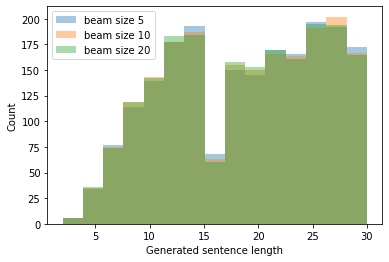

In [ ]:
for b in [5,10,20]:

    with open(f'./eval_out_{b}.txt.test', 'r') as f:
        lines = f.readlines()
        length = [len(l.split()) for l in lines]
    plt.hist(length, bins=15, label=f'beam size {b}', alpha=.4)

plt.legend()
plt.xlabel('Generated sentence length')
plt.ylabel('Count')